### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_14 = pd.read_csv('Patient 14_data.csv')

In [3]:
patient_14.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,...,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,0.043337,0.330305,0.617088,1.206706,1.824283,6.077832,1.273211,1.050217,1.012420,1.043626,...,1.928907,1.762046,1.999114,2.013268,0.939397,1.739661,2.047079,2.033102,1.939479,48.152845
std,0.014275,0.028904,0.018538,0.015197,0.074367,7.229842,0.155160,0.019209,0.001765,0.022518,...,0.011393,0.034161,0.012194,0.030116,0.038606,0.026712,0.006830,0.002110,0.032166,16.302568
min,0.015848,0.277140,0.592020,1.179629,1.703581,2.109790,1.124924,1.031122,1.005896,0.997333,...,1.888420,1.630664,1.925857,1.721392,0.761048,1.660133,2.035109,2.024535,1.829048,20.900000
25%,0.034781,0.319229,0.602121,1.197975,1.779256,3.725393,1.206622,1.038990,1.011536,1.034330,...,1.921217,1.742650,1.995291,1.998050,0.917288,1.723418,2.040982,2.032060,1.935832,35.500000
50%,0.039152,0.326309,0.611039,1.201622,1.798118,4.028331,1.220844,1.043079,1.012128,1.052472,...,1.929620,1.768012,2.001437,2.016355,0.938658,1.737719,2.046260,2.033305,1.948402,46.200000
75%,0.047014,0.335228,0.628214,1.207096,1.853547,4.721630,1.247959,1.049354,1.012825,1.058779,...,1.937379,1.789466,2.006429,2.031589,0.965965,1.751395,2.052610,2.034472,1.957960,60.600000
max,0.094612,0.538100,0.686530,1.281706,1.993368,56.249689,2.278975,1.231474,1.021313,1.074605,...,1.958830,1.832729,2.019044,2.077933,1.050367,1.884663,2.066310,2.038867,1.983600,97.700000


In [4]:
X=patient_14.drop('BIS', axis=1)
y= patient_14['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

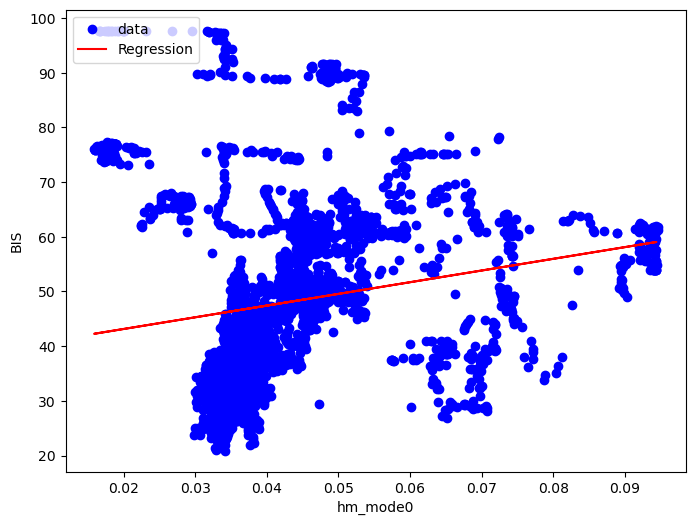

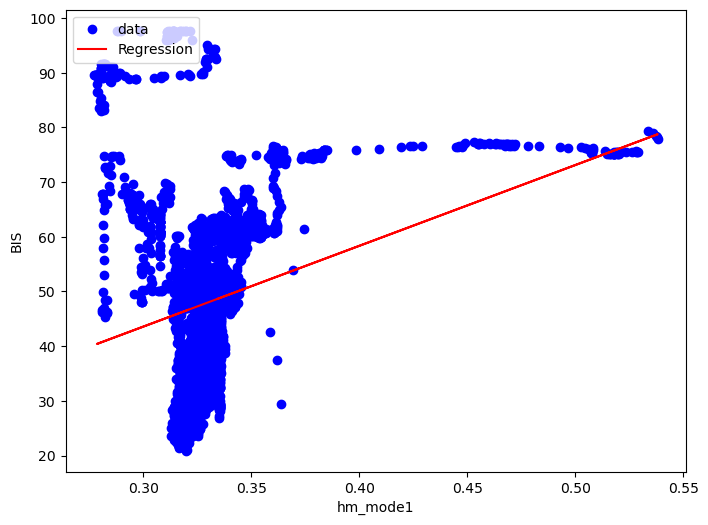

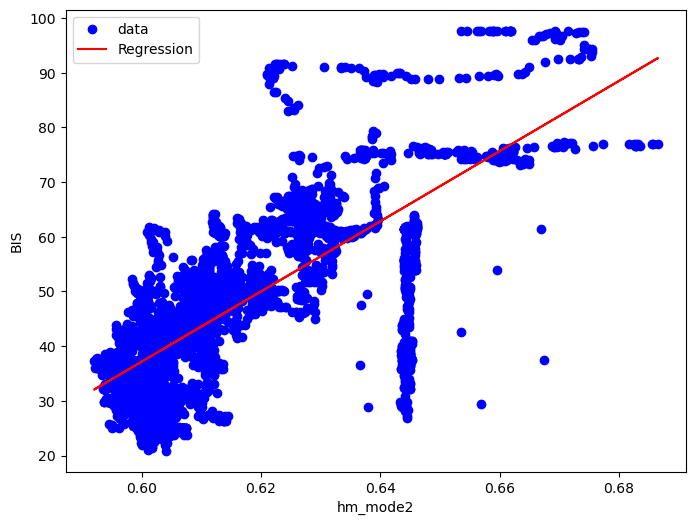

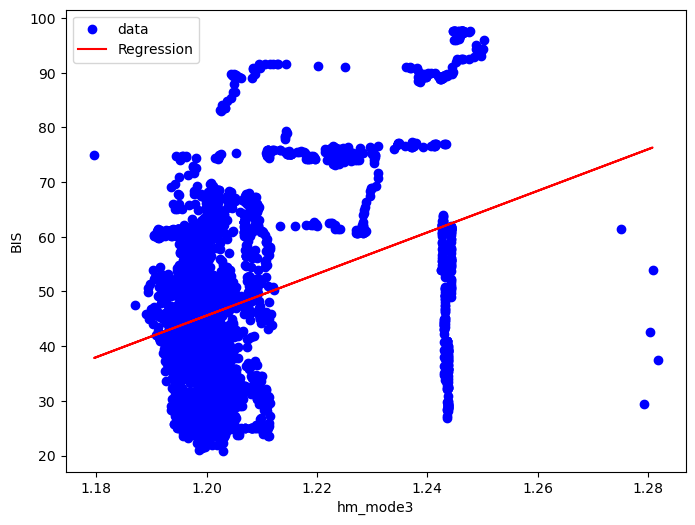

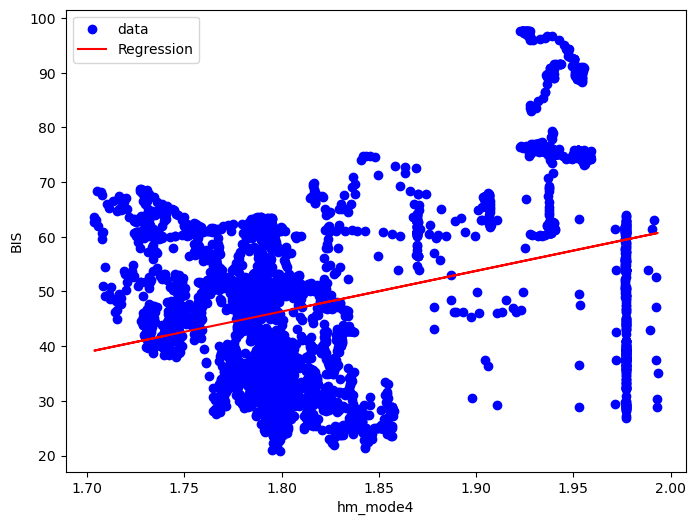

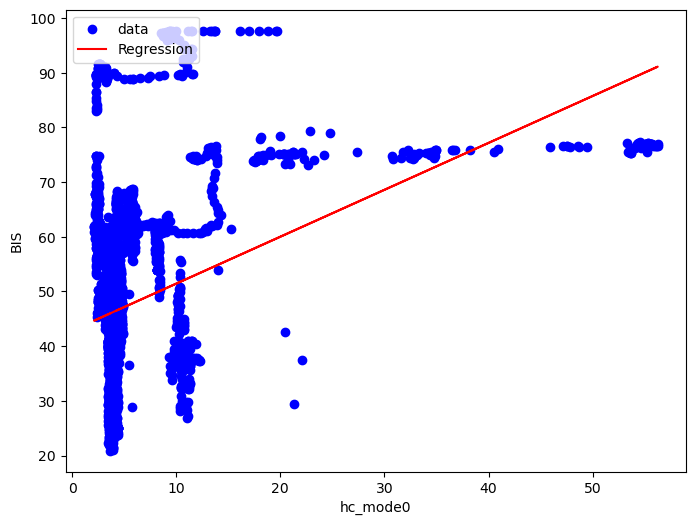

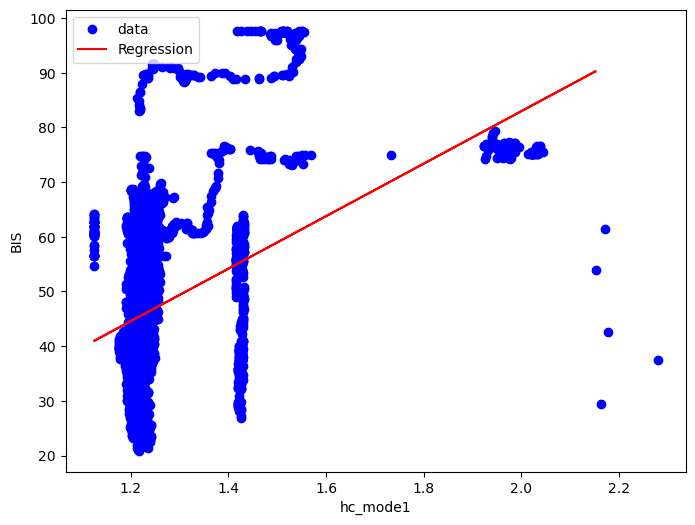

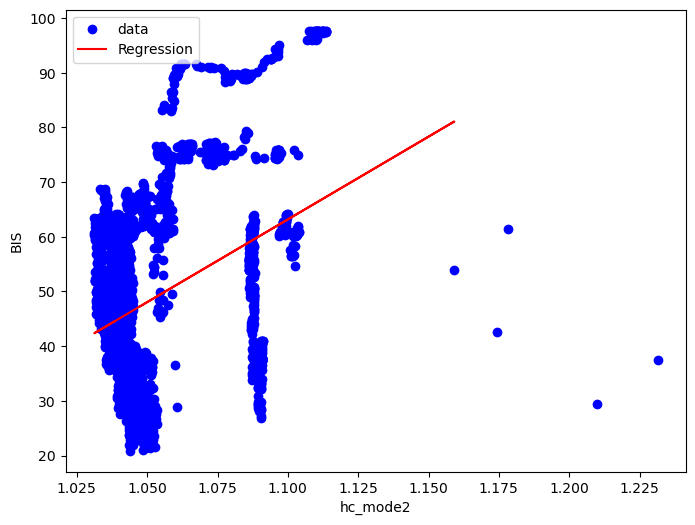

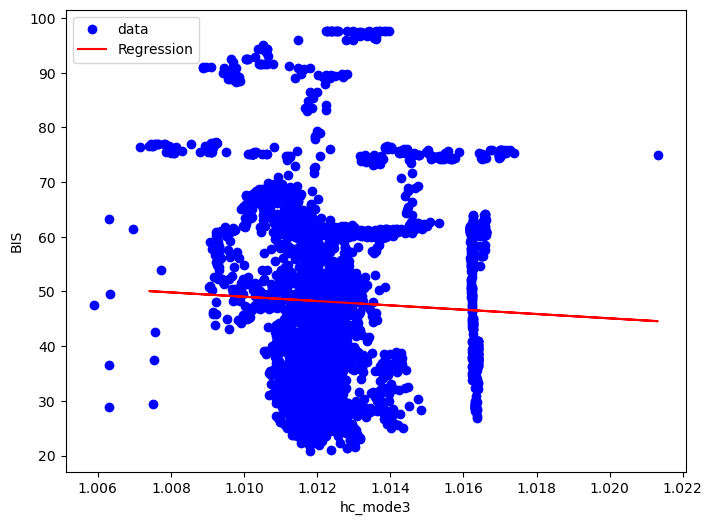

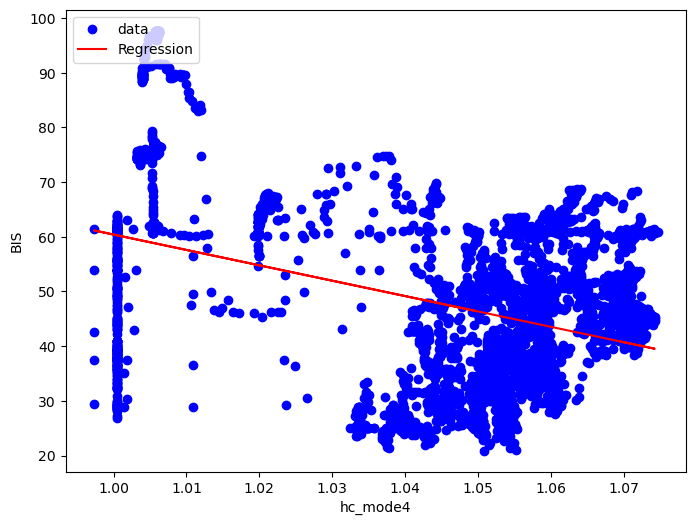

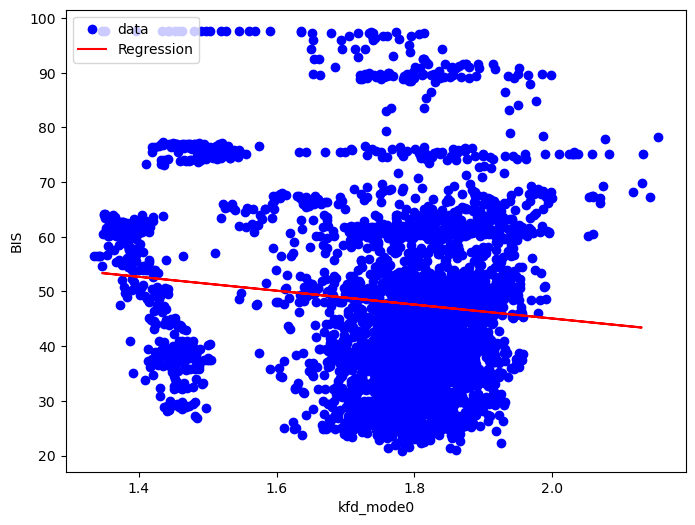

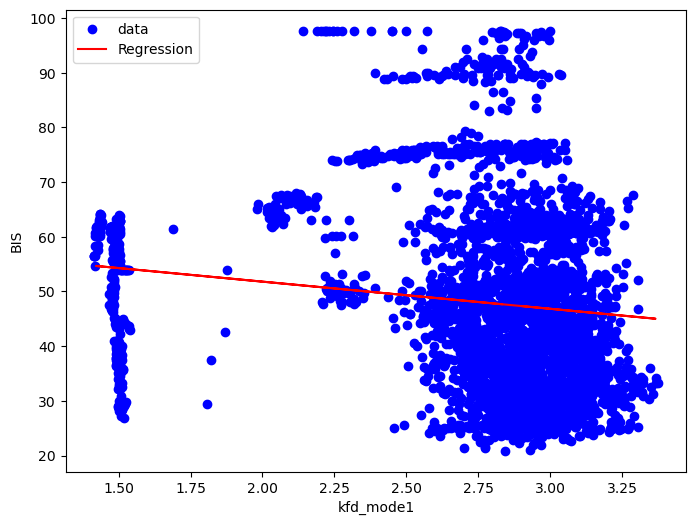

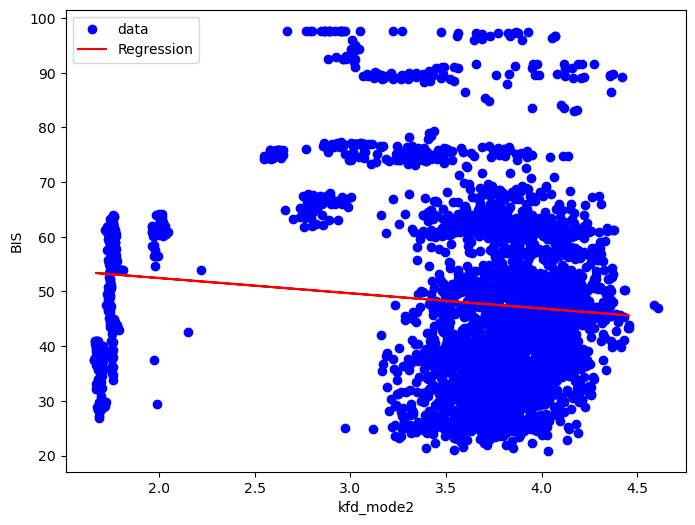

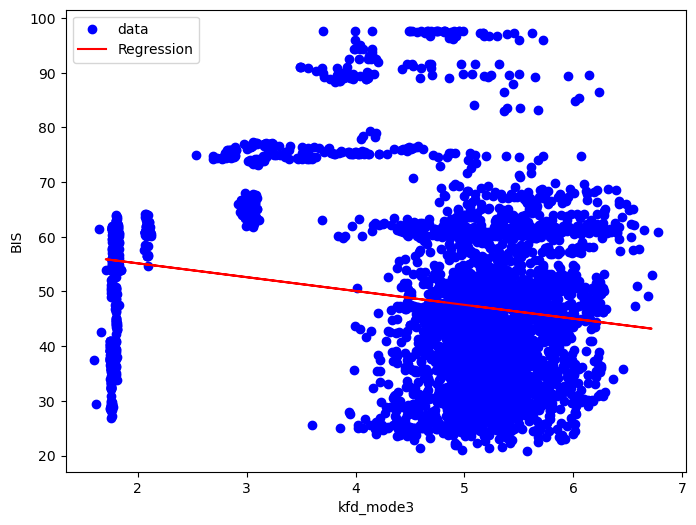

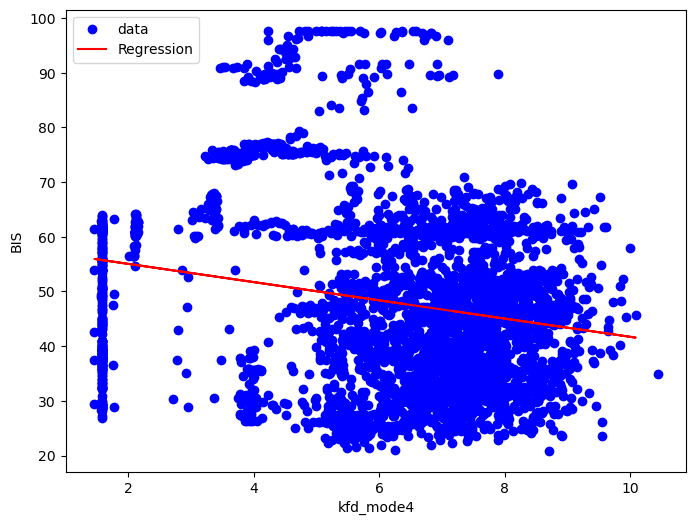

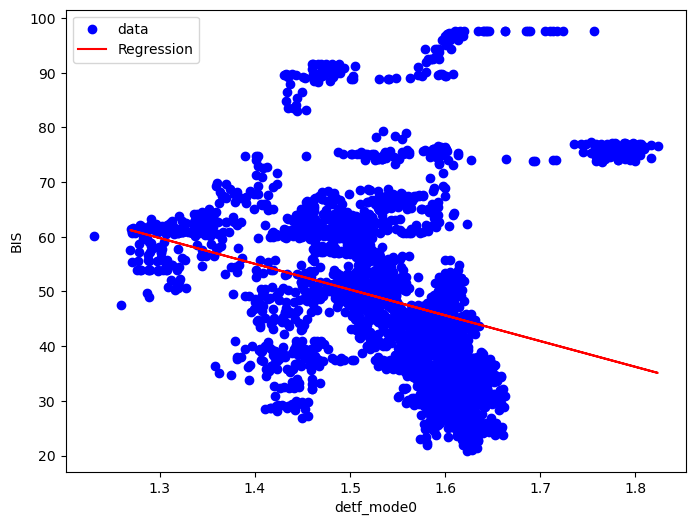

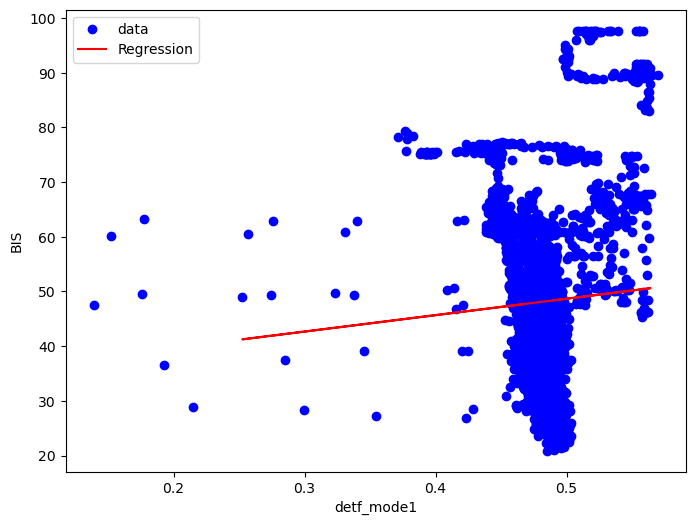

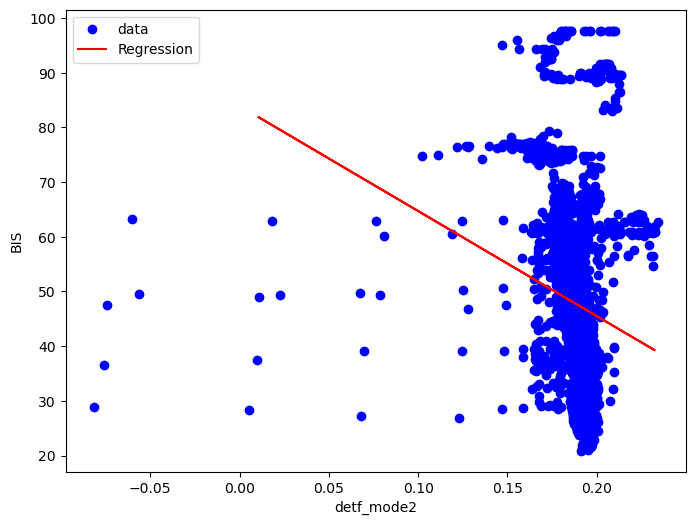

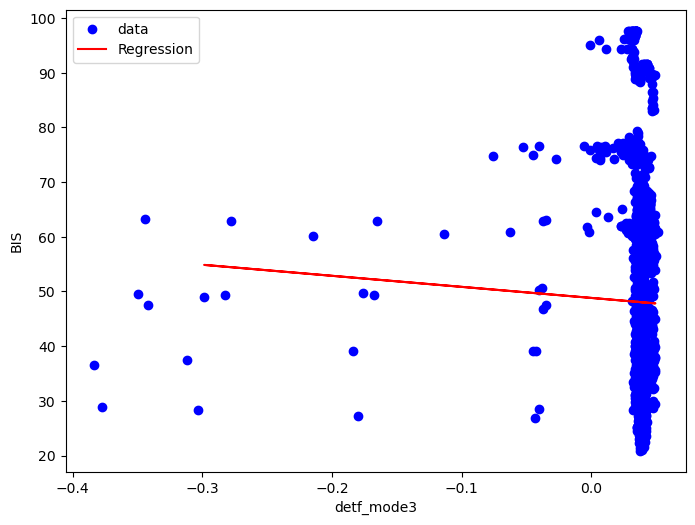

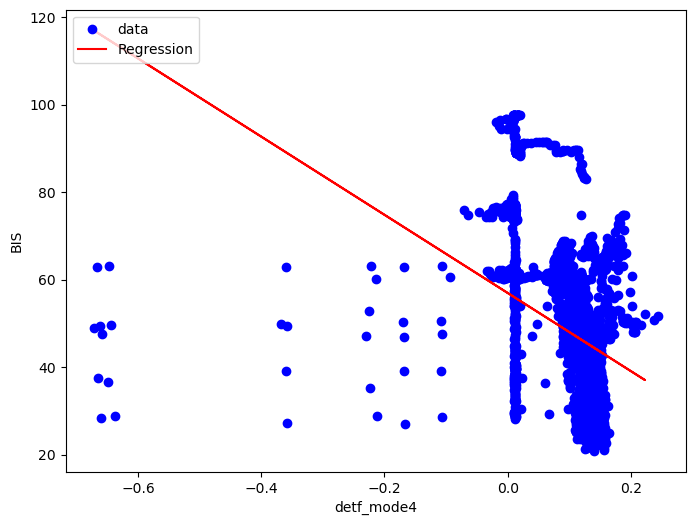

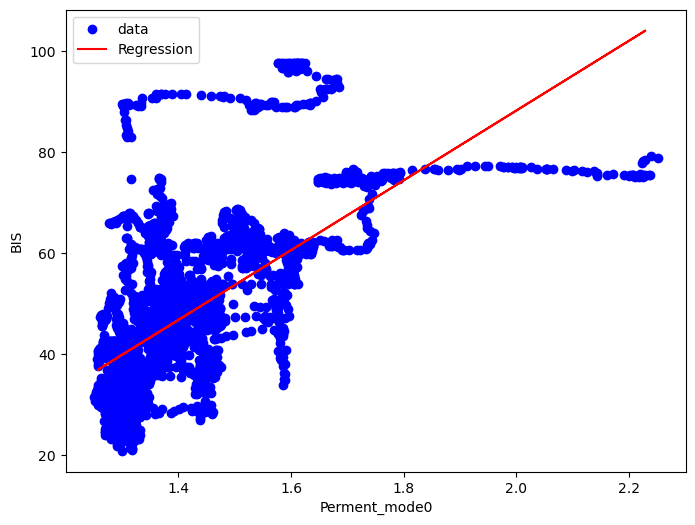

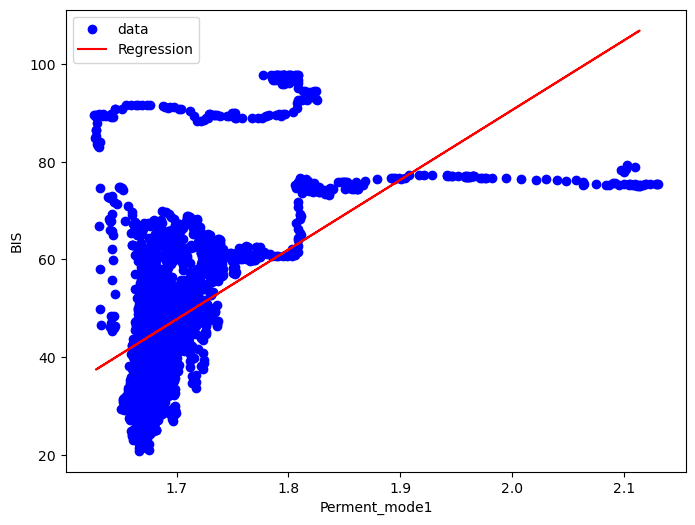

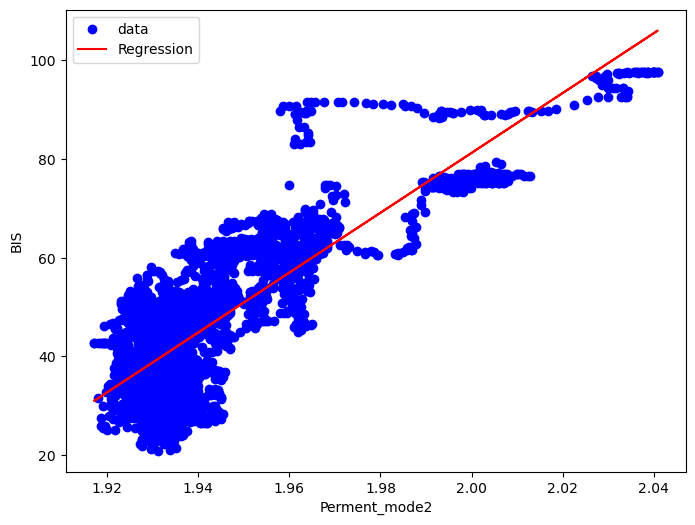

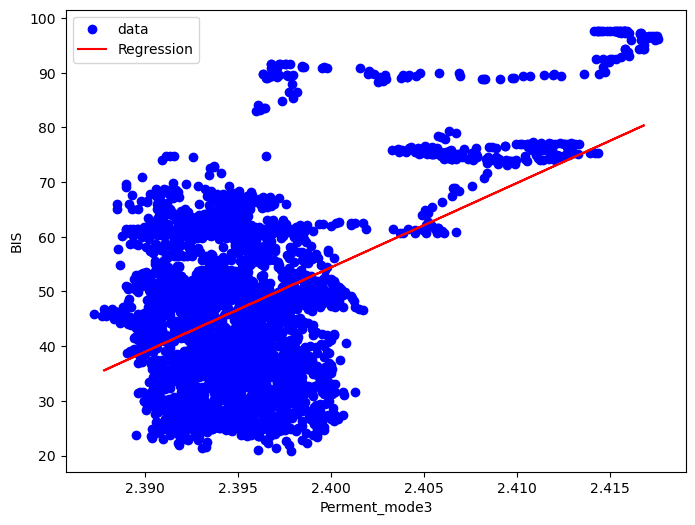

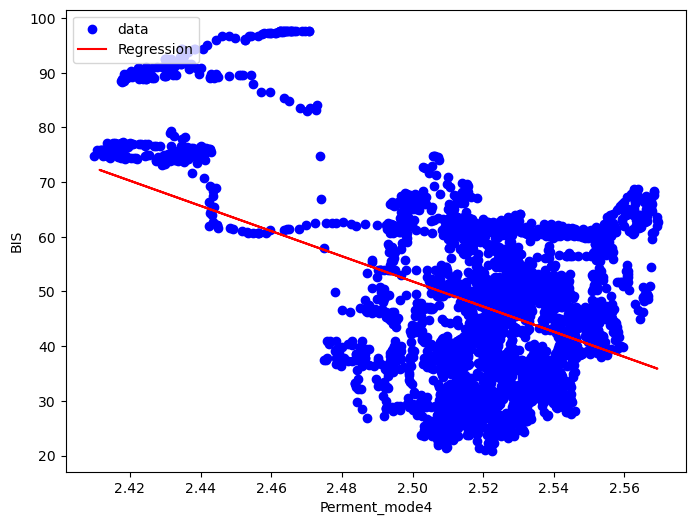

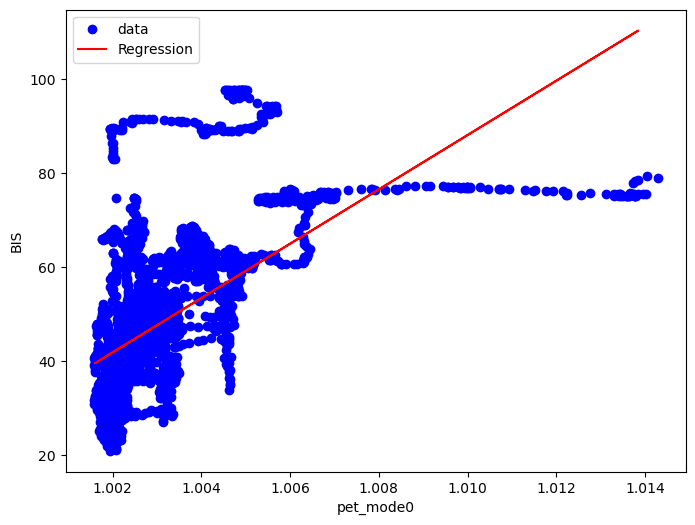

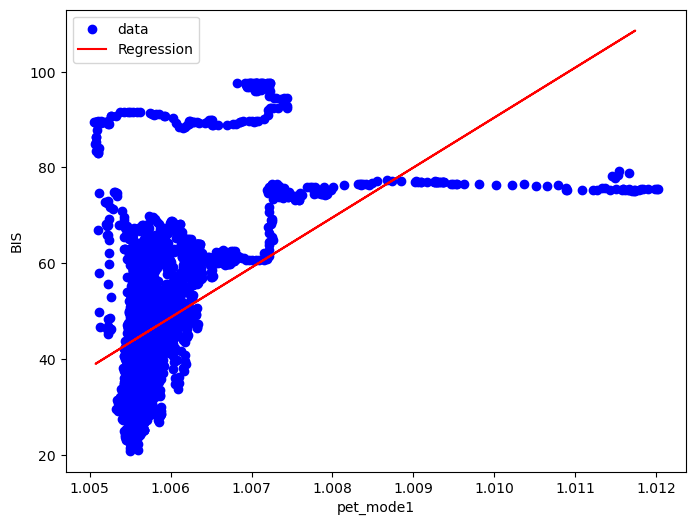

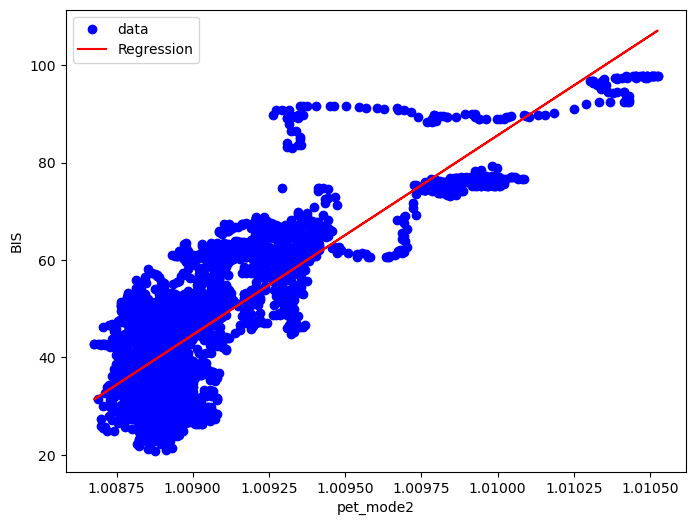

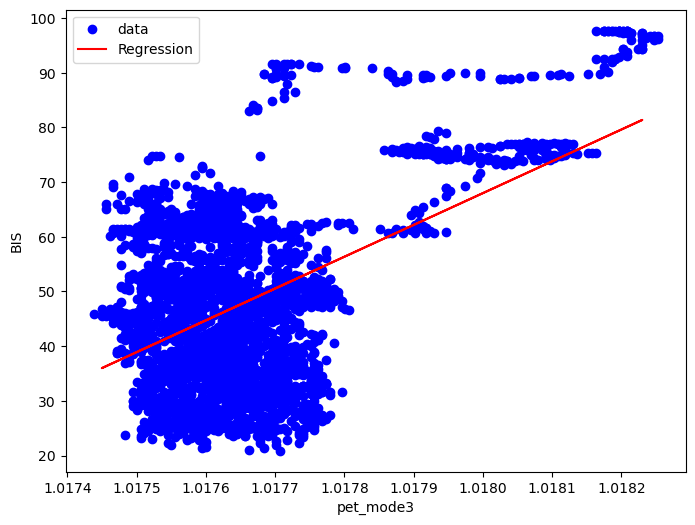

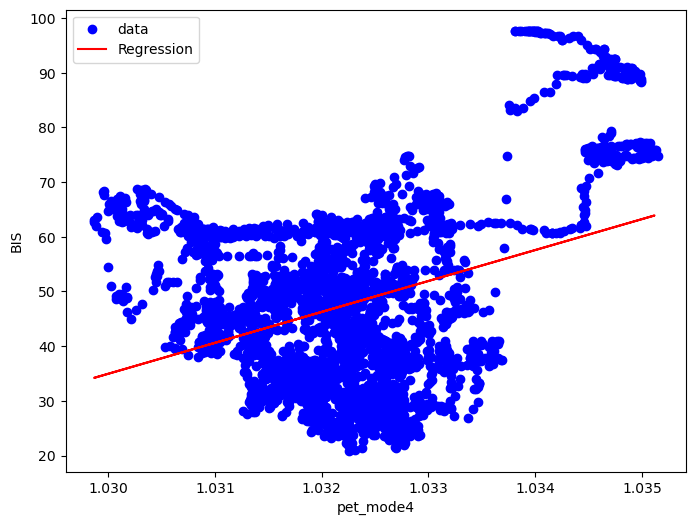

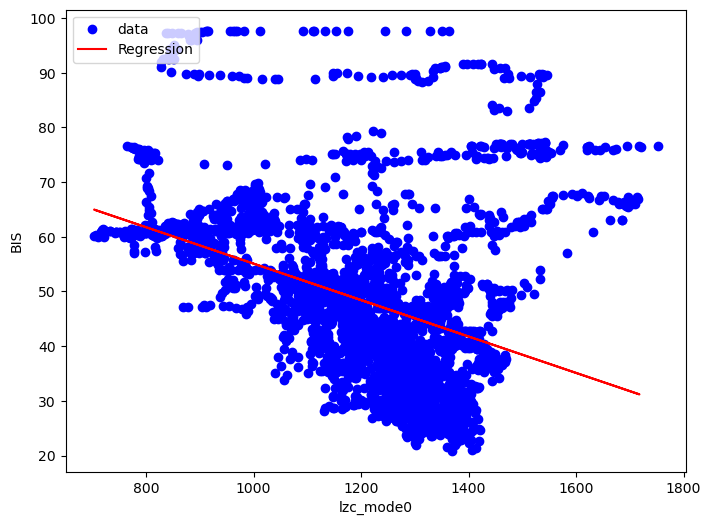

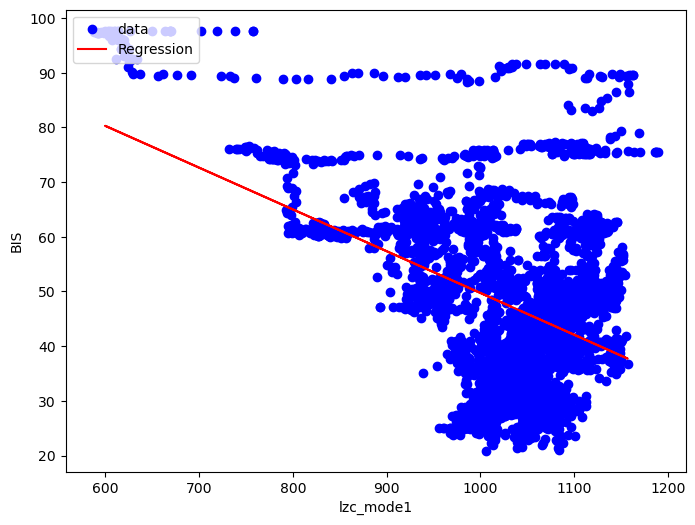

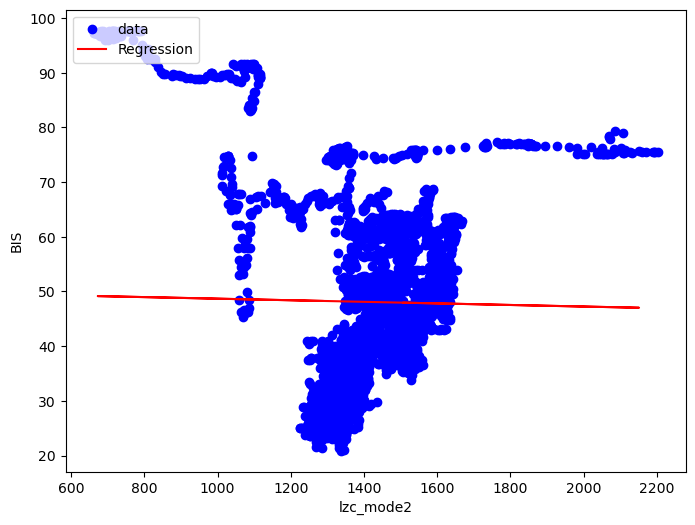

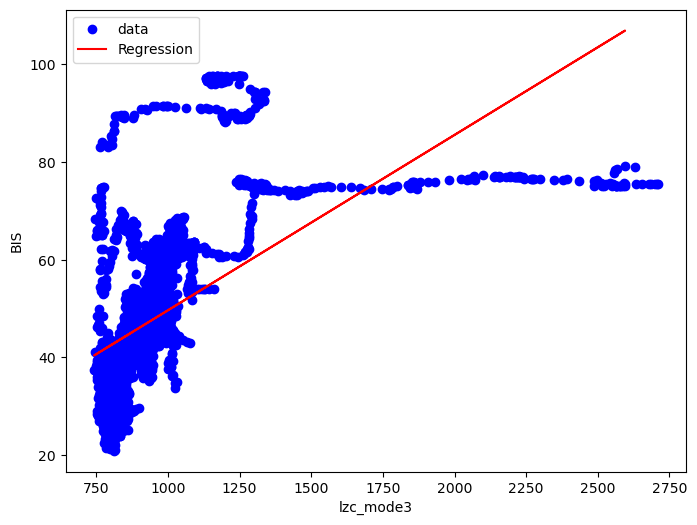

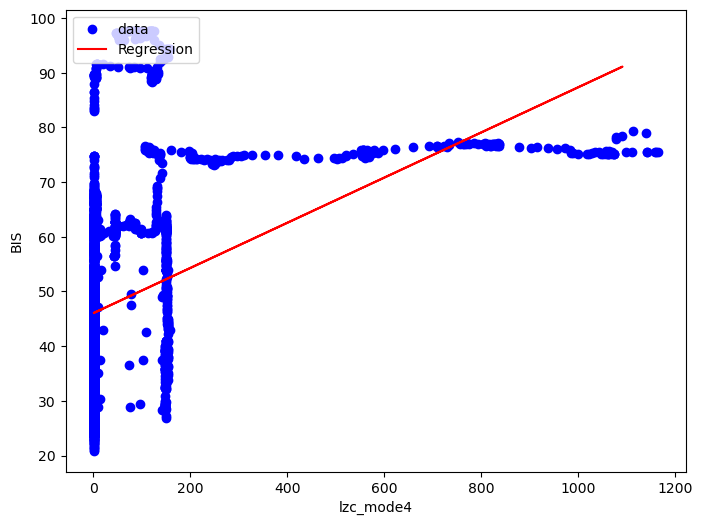

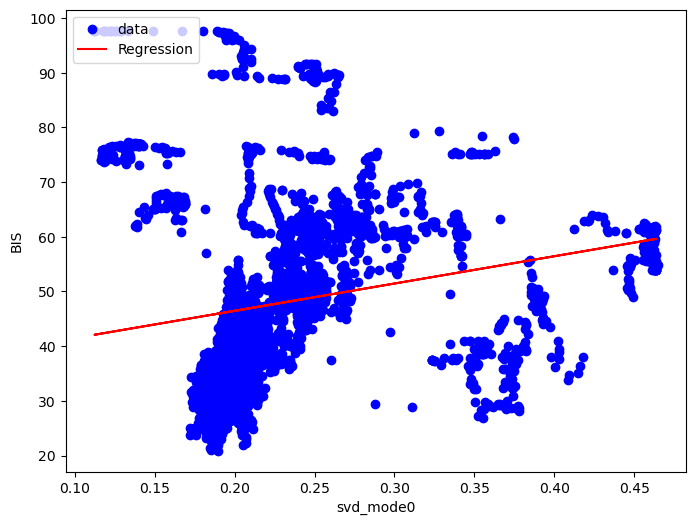

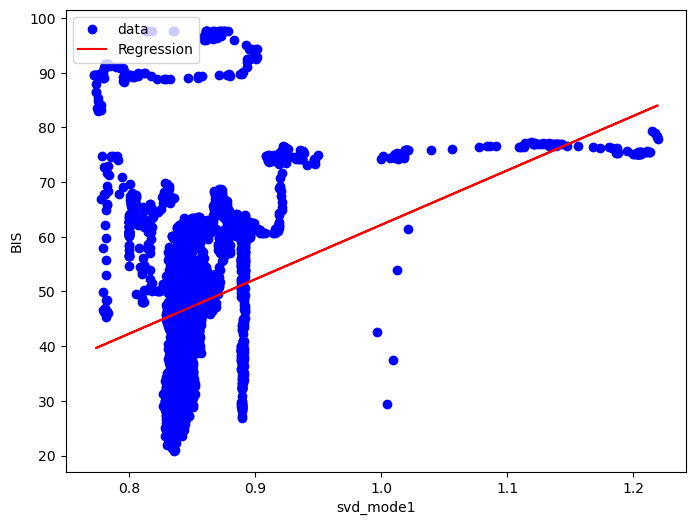

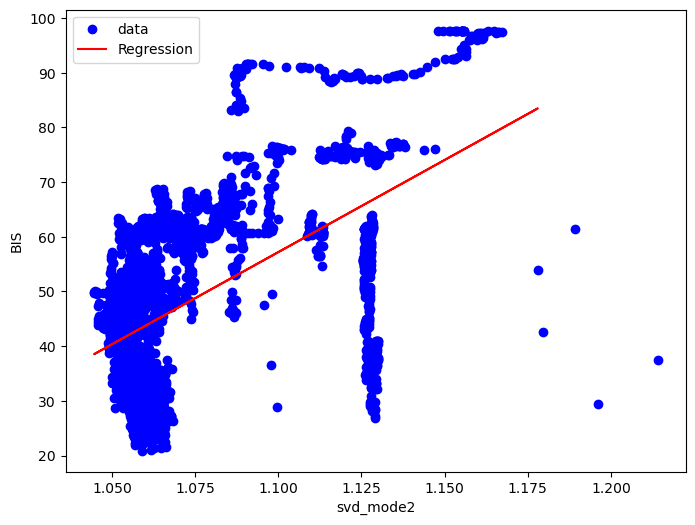

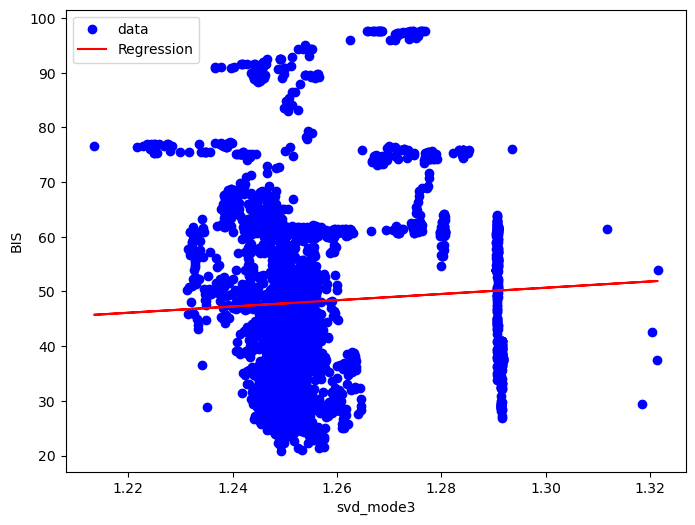

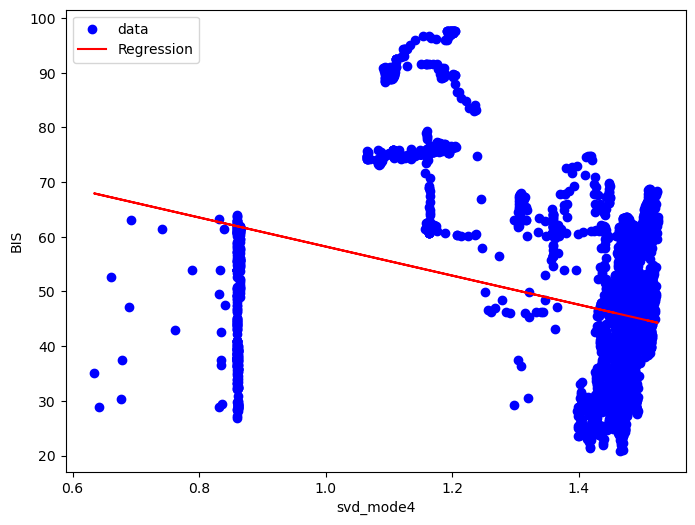

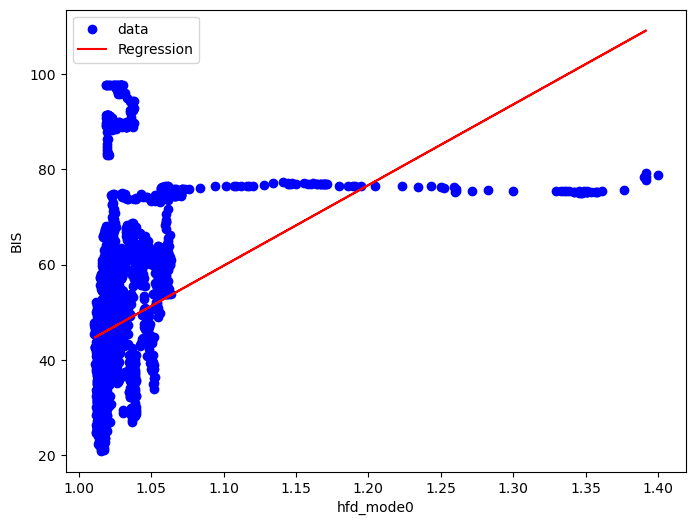

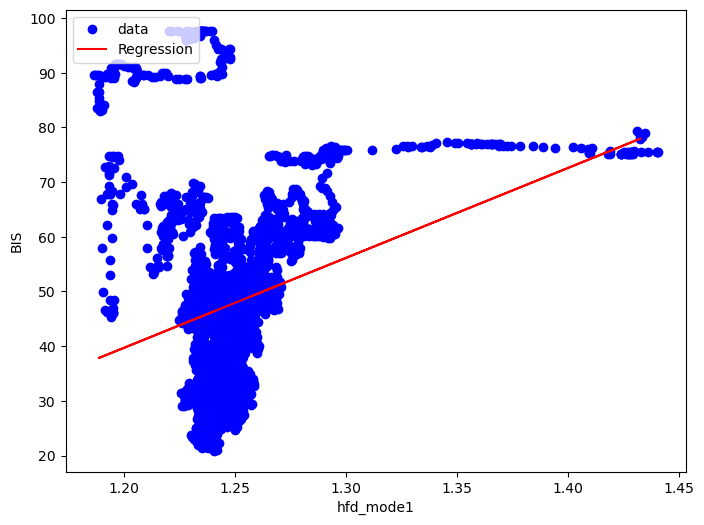

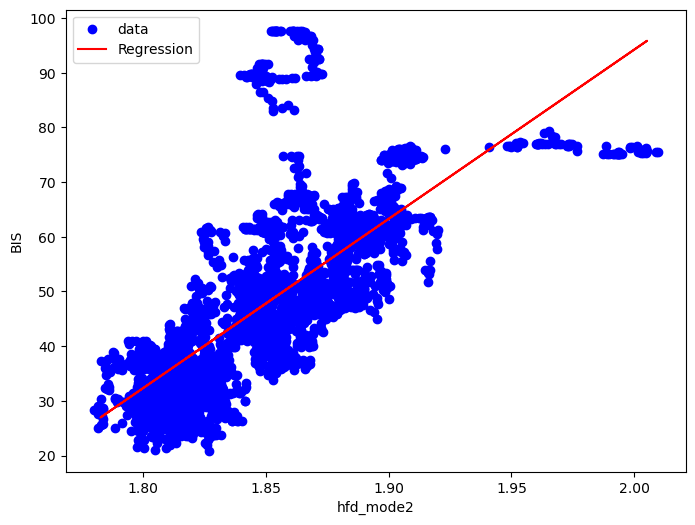

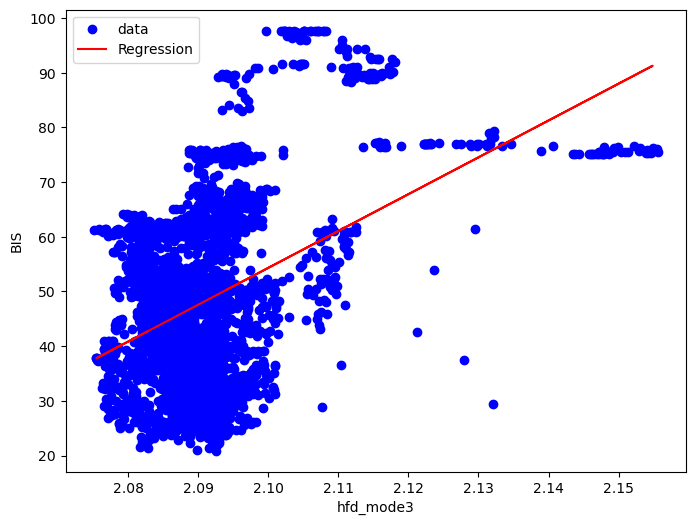

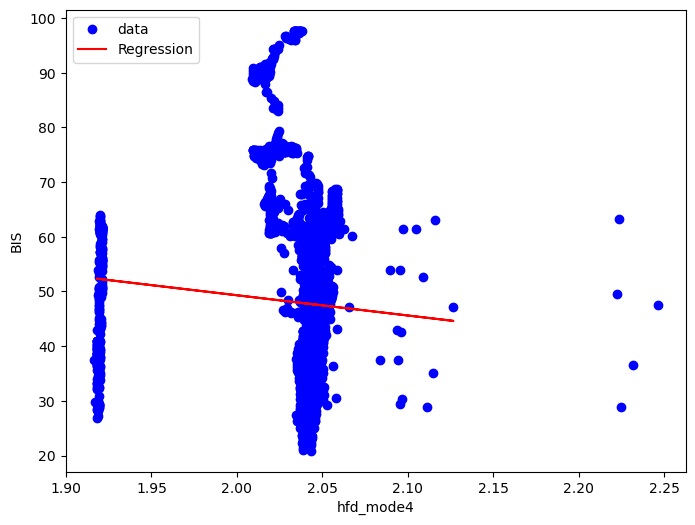

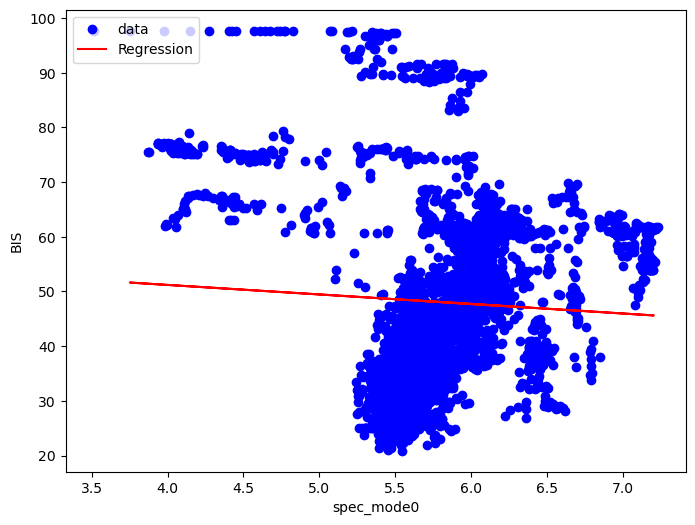

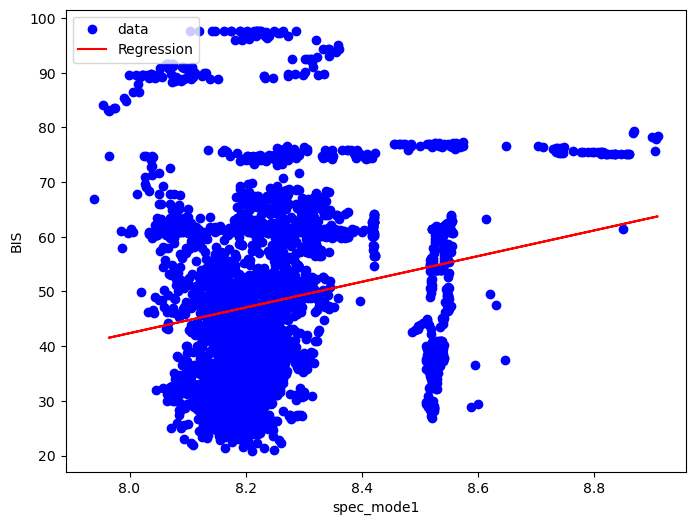

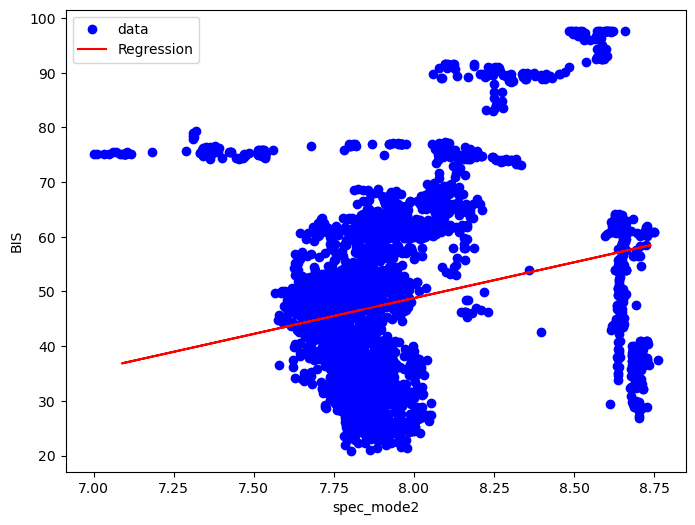

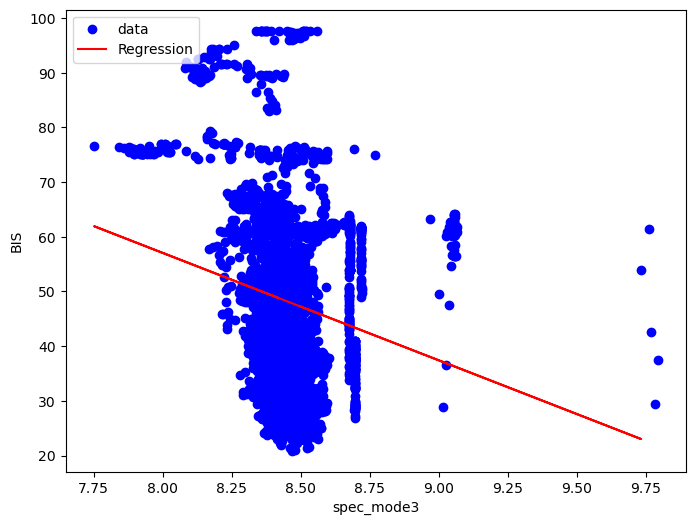

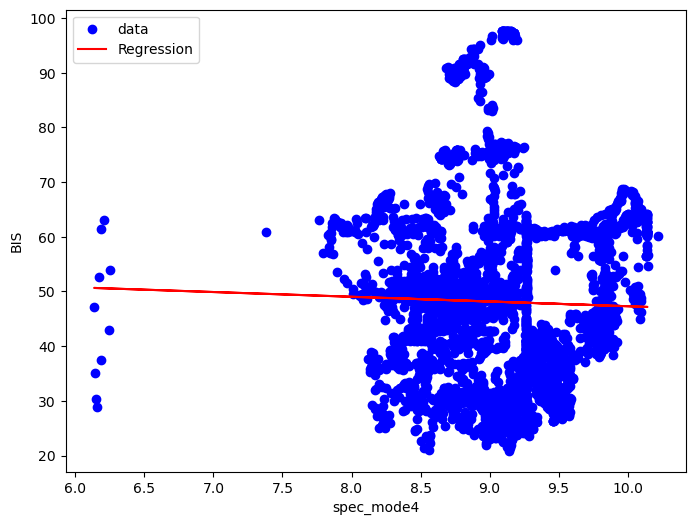

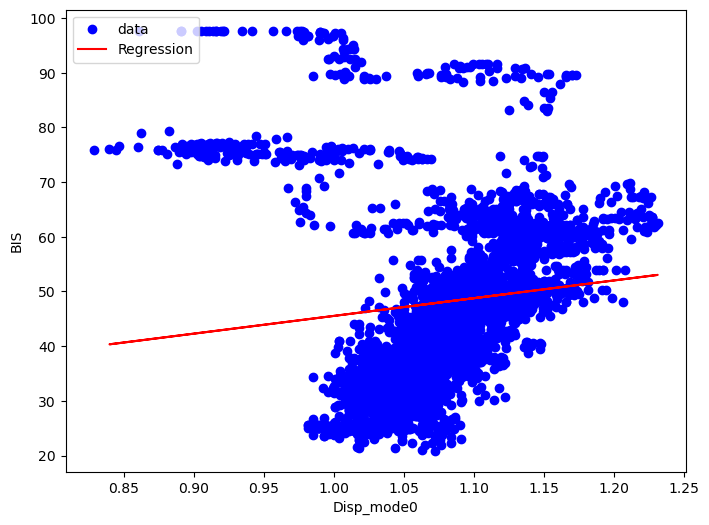

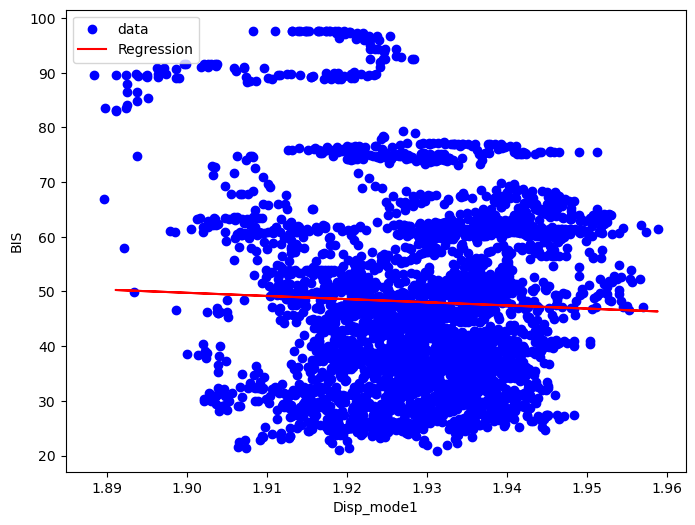

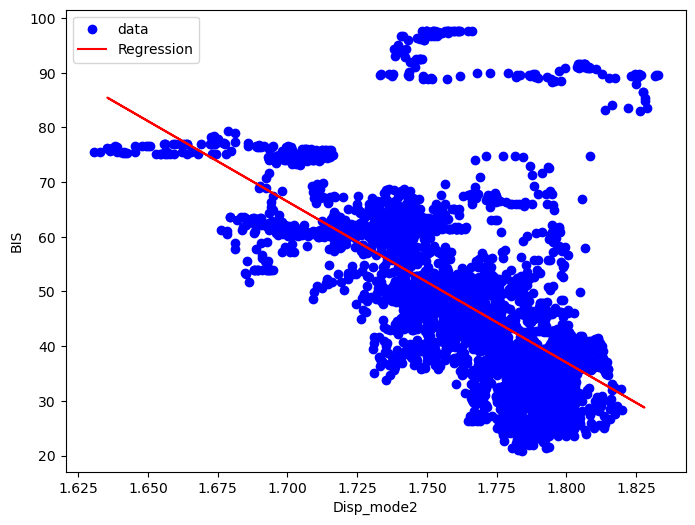

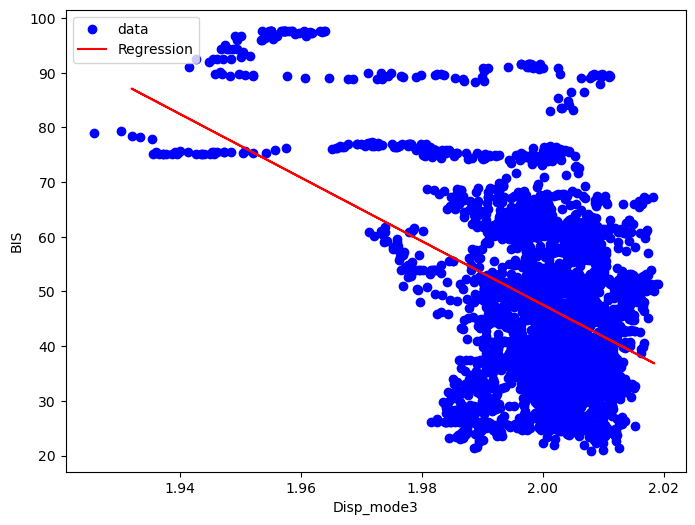

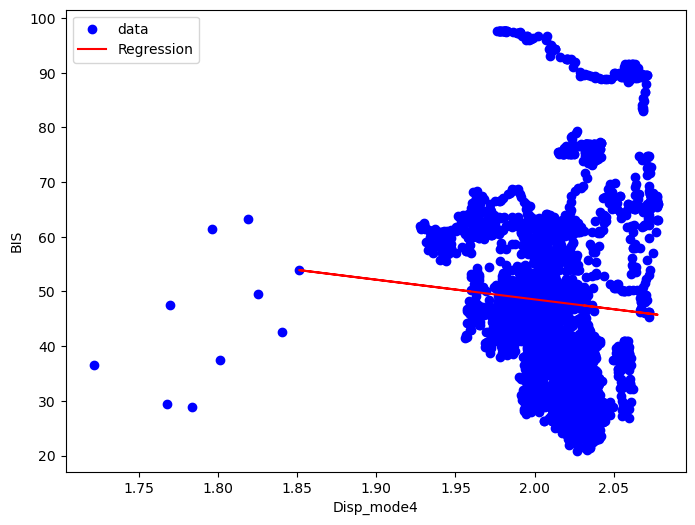

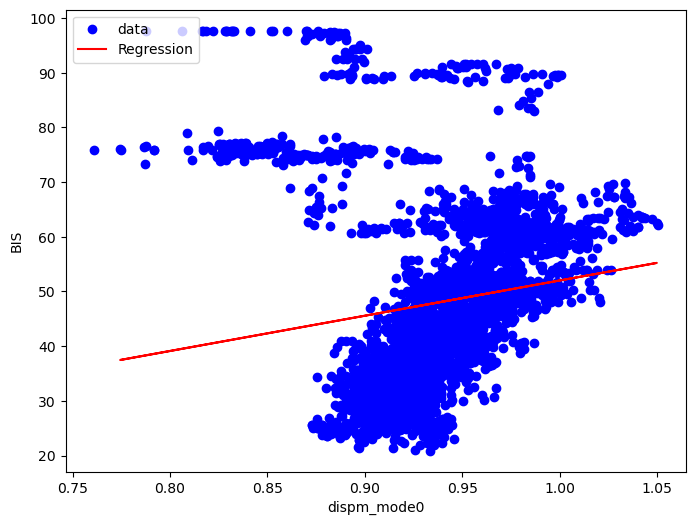

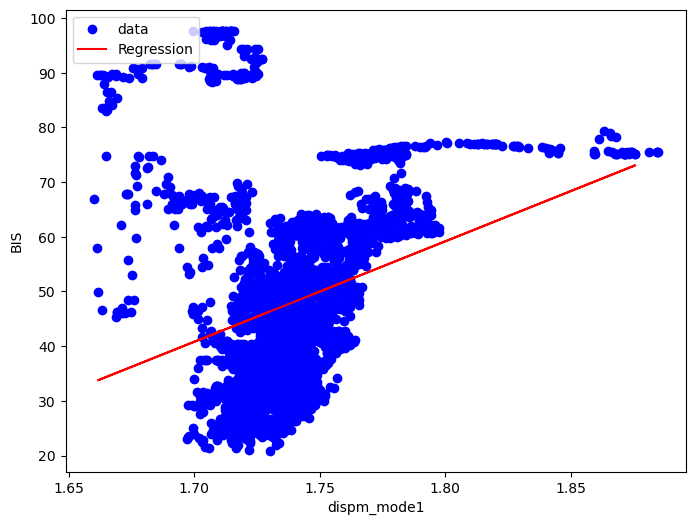

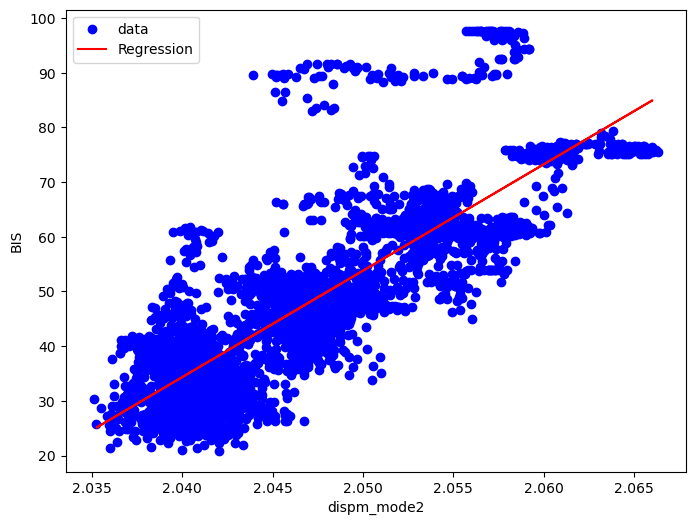

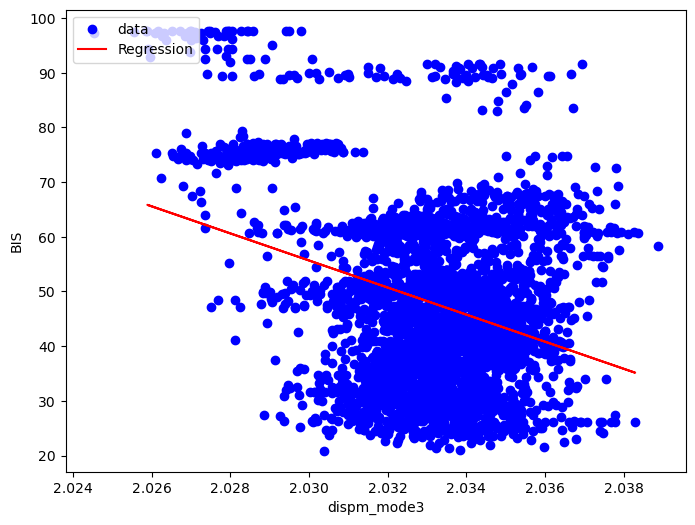

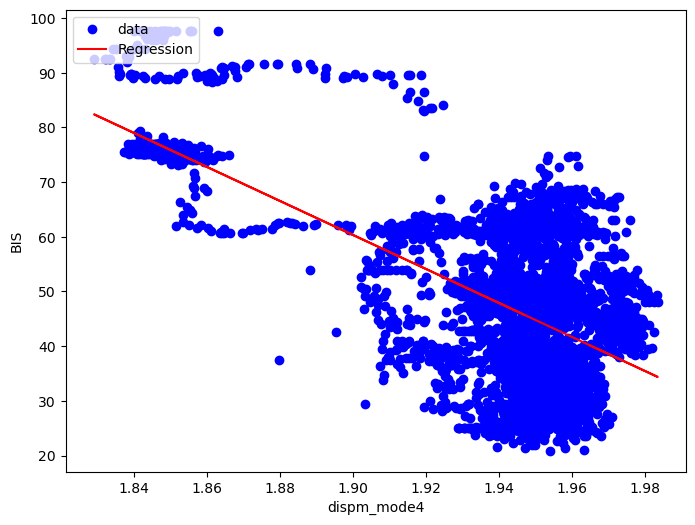

In [6]:

for column in patient_14.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_14, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
22,Perment_mode2_r2,68.623806
27,pet_mode2_r2,68.219464
57,dispm_mode2_r2,63.998696
2,hm_mode2_r2,51.490790
42,hfd_mode2_r2,50.017387
20,Perment_mode0_r2,43.364888
59,dispm_mode4_r2,39.855308
25,pet_mode0_r2,37.960628
33,lzc_mode3_r2,35.518401
52,Disp_mode2_r2,33.810250


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.537252
33      lzc_mode3    0.146985
24  Perment_mode4    0.080212
27      pet_mode2    0.061104
29      pet_mode4    0.033753
52     Disp_mode2    0.020349
32      lzc_mode2    0.012162
41      hfd_mode1    0.009500
57    dispm_mode2    0.006615
38      svd_mode3    0.006466
37      svd_mode2    0.006431
7        hc_mode2    0.006320
19     detf_mode4    0.005692
49     spec_mode4    0.005510
42      hfd_mode2    0.004055
53     Disp_mode3    0.003372
56    dispm_mode1    0.002857
54     Disp_mode4    0.002802
23  Perment_mode3    0.002729
44      hfd_mode4    0.002374
1        hm_mode1    0.002369
6        hc_mode1    0.002183
46     spec_mode1    0.002085
51     Disp_mode1    0.001888
8        hc_mode3    0.001749
55    dispm_mode0    0.001707
28      pet_mode3    0.001696
35      svd_mode0    0.001638
48     spec_mode3    0.001519
4        hm_mode4    0.001461
50     Disp_mode0    0.001431
34      lzc_mode4    0.001418
30      lz